In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [7]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [16]:
sales_team  = pd.read_csv('../data/sales_team.csv')
order_leads = pd.read_csv('../data/order_leads.csv', parse_dates=['Date'])
invoices    = pd.read_csv('../data/invoices.csv', parse_dates=['Date of Meal'])

In [17]:
sales_team.head()

Sales Rep      Sales Rep Id            Company Name        Company Id
0  William Taylor  ZTZA0ZLYZR85PTUJ  Melancholy Social-Role  D0AUXPP07H6AVSGD
1  William Taylor  ZTZA0ZLYZR85PTUJ          Pee-Wee Pigeon  TJW99R4RWH02INII
2  William Taylor  ZTZA0ZLYZR85PTUJ     Vaginal 36-Year-Old  3S20IO1O1DYXMUNU
3  William Taylor  ZTZA0ZLYZR85PTUJ    Unhurried Musician'S  FDWW0TQRPGMVI2A7
4  William Taylor  ZTZA0ZLYZR85PTUJ     Comprehensive Lists  C30FY83UNLVBA0O3

In [18]:
order_leads.head()

Order Id        Company Id            Company Name       Date  \
0  HZSXLI1IS9RGABZW  D0AUXPP07H6AVSGD  Melancholy Social-Role 2017-10-13   
1  582WPS3OW8T6YT0R  D0AUXPP07H6AVSGD  Melancholy Social-Role 2017-09-02   
2  KRF65MQZBOYG4Y9T  D0AUXPP07H6AVSGD  Melancholy Social-Role 2016-12-21   
3  N3EDZ5V1WGSWW828  D0AUXPP07H6AVSGD  Melancholy Social-Role 2018-06-03   
4  QXBC8COXEXGFSPLP  D0AUXPP07H6AVSGD  Melancholy Social-Role 2014-07-26   

   Order Value  Converted  
0         6952          0  
1         7930          0  
2         5538          1  
3         1113          0  
4         4596          0

In [19]:
invoices.head()

Meal Id        Company Id        Date of Meal  \
0  QBGU1W8BRZZFHYUZ  D0AUXPP07H6AVSGD 2017-10-09 21:00:00   
1  QFNO07V7P3BTJSDK  D0AUXPP07H6AVSGD 2018-06-07 07:00:00   
2  ZDQ15BT9LLWUQ6M8  D0AUXPP07H6AVSGD 2014-12-18 20:00:00   
3  GL1ZVDU85Q9EO4TA  D0AUXPP07H6AVSGD 2018-03-05 12:00:00   
4  42GWYA5XD8NVINY3  D0AUXPP07H6AVSGD 2017-06-17 08:00:00   

                       Participants  Meal Price  
0                 ['Violet Medina']       598.0  
1                 ['Connie Harper']        89.0  
2                  ['Arthur Lopez']       295.0  
3  ['Violet Medina' 'Arthur Lopez']       193.0  
4                  ['Arthur Lopez']       348.0

In [21]:
sales_team = sales_team.rename(columns={'Company Name': 'Company_Name', 
                                        'Company Id'  : 'Company_Id', 
                                        'Sales Rep'   : 'Sales_Rep', 
                                        'Sales Rep Id': 'Sales_Rep_Id'})
sales_team

Sales_Rep      Sales_Rep_Id                    Company_Name  \
0     William Taylor  ZTZA0ZLYZR85PTUJ          Melancholy Social-Role   
1     William Taylor  ZTZA0ZLYZR85PTUJ                  Pee-Wee Pigeon   
2     William Taylor  ZTZA0ZLYZR85PTUJ             Vaginal 36-Year-Old   
3     William Taylor  ZTZA0ZLYZR85PTUJ            Unhurried Musician'S   
4     William Taylor  ZTZA0ZLYZR85PTUJ             Comprehensive Lists   
...              ...               ...                             ...   
4614    Ida Woodward  LF3CPWWZKSNB1AXI          Unauthorized Increases   
4615    Ida Woodward  LF3CPWWZKSNB1AXI             Atom-Like Principle   
4616    Ida Woodward  LF3CPWWZKSNB1AXI        Congratulatory Economist   
4617    Ida Woodward  LF3CPWWZKSNB1AXI                 Readable Pilots   
4618    Ida Woodward  LF3CPWWZKSNB1AXI  Trade-Preparatory Quarterbacks   

            Company_Id  
0     D0AUXPP07H6AVSGD  
1     TJW99R4RWH02INII  
2     3S20IO1O1DYXMUNU  
3     FDWW0TQRPGMVI2A7  
4     C30FY83UNLVBA0O3  
...                ...  
4614  654ZMAXSV11BOMMI  
4615  42AO6UOXN0GXVHFQ  
4616  4B714VS0FWLGBSMU  
4617  G4D892KB5W0UCPR4  
4618  APH243SK72T90MPS  

[4619 rows x 4 columns]

In [23]:
order_leads = order_leads.rename(columns={'Order Id': 'Order_Id', 
                                          'Company Id': 'Company_Id', 
                                          'Company Name': 'Company_Name', 
                                          'Order Value': 'Order_Value'})
order_leads

Order_Id        Company_Id                    Company_Name  \
0      HZSXLI1IS9RGABZW  D0AUXPP07H6AVSGD          Melancholy Social-Role   
1      582WPS3OW8T6YT0R  D0AUXPP07H6AVSGD          Melancholy Social-Role   
2      KRF65MQZBOYG4Y9T  D0AUXPP07H6AVSGD          Melancholy Social-Role   
3      N3EDZ5V1WGSWW828  D0AUXPP07H6AVSGD          Melancholy Social-Role   
4      QXBC8COXEXGFSPLP  D0AUXPP07H6AVSGD          Melancholy Social-Role   
...                 ...               ...                             ...   
99995  HKZFX556ZQRZJZWR  APH243SK72T90MPS  Trade-Preparatory Quarterbacks   
99996  962CSDMAJ49E0CRK  APH243SK72T90MPS  Trade-Preparatory Quarterbacks   
99997  ZW7RO9TLL6EVVJEC  APH243SK72T90MPS  Trade-Preparatory Quarterbacks   
99998  LNKGIWMZ9RT49IE9  APH243SK72T90MPS  Trade-Preparatory Quarterbacks   
99999  X9Y21H4JWX6OGC2Z  APH243SK72T90MPS  Trade-Preparatory Quarterbacks   

            Date  Order_Value  Converted  
0     2017-10-13         6952          0  
1     2017-09-02         7930          0  
2     2016-12-21         5538          1  
3     2018-06-03         1113          0  
4     2014-07-26         4596          0  
...          ...          ...        ...  
99995 2017-11-06         7516          0  
99996 2018-08-02          442          1  
99997 2014-11-02         8544          0  
99998 2017-04-01         6650          0  
99999 2016-07-27          953          0  

[100000 rows x 6 columns]

### –ì—Ä–∞—Ñ–∏–∫ CR –ø–æ –¥–Ω—è–º

In [24]:
cr_by_day = order_leads.\
                        groupby(['Date']) \
                        .agg({'Converted': 'mean'}) \
                        .rename(columns={'Converted': 'CR'}) \
                        .sort_values('Date')
cr_by_day

CR
Date                
2014-01-01  0.229167
2014-01-02  0.230769
2014-01-03  0.116667
2014-01-04  0.178571
2014-01-05  0.140000
...              ...
2018-12-27  0.109091
2018-12-28  0.139535
2018-12-29  0.132075
2018-12-30  0.193548
2018-12-31  0.080000

[1826 rows x 1 columns]

<Axes: xlabel='Date'>

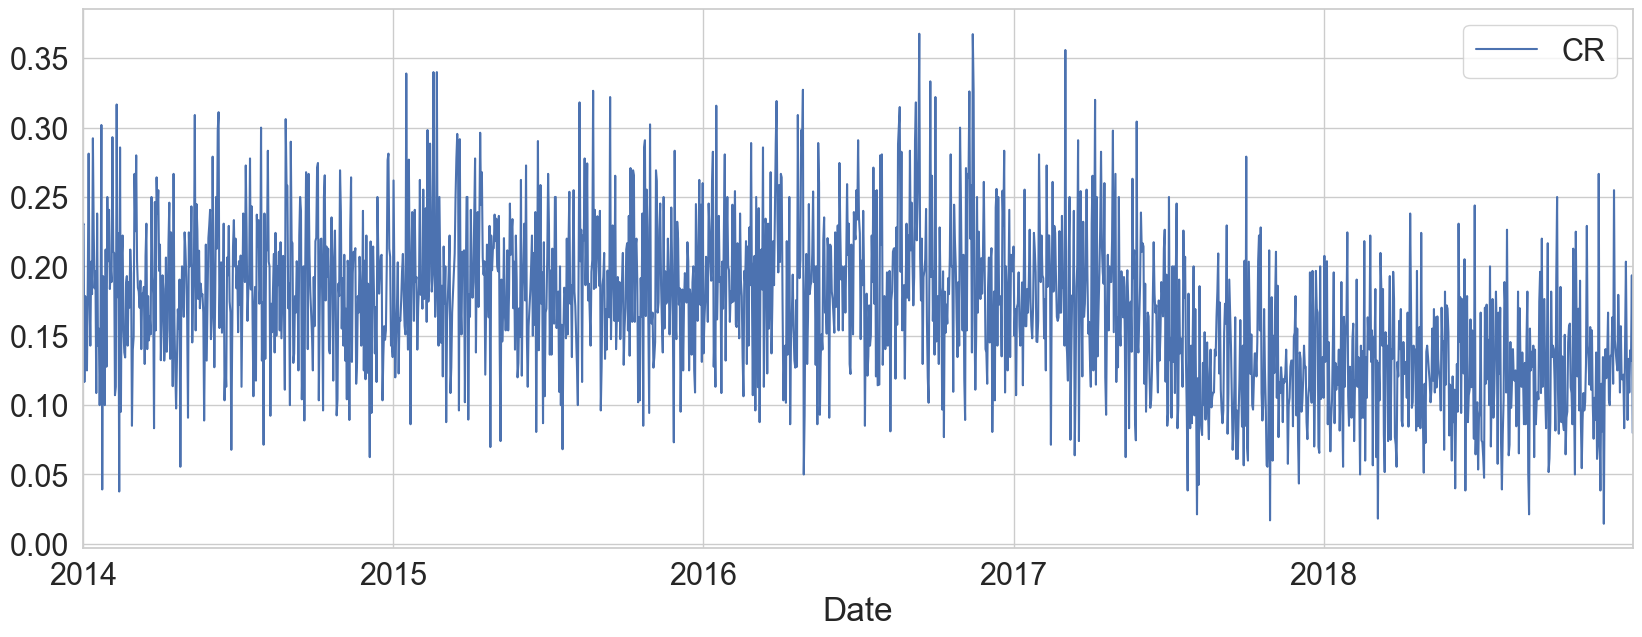

In [25]:
cr_by_day.plot()

–£–±–∏—Ä–∞–µ–º "—à—É–º" —Å–∫–æ–ª—å–∑—è—â–µ–π —Å—Ä–µ–¥–Ω–µ–π (30)

<Axes: xlabel='Date'>

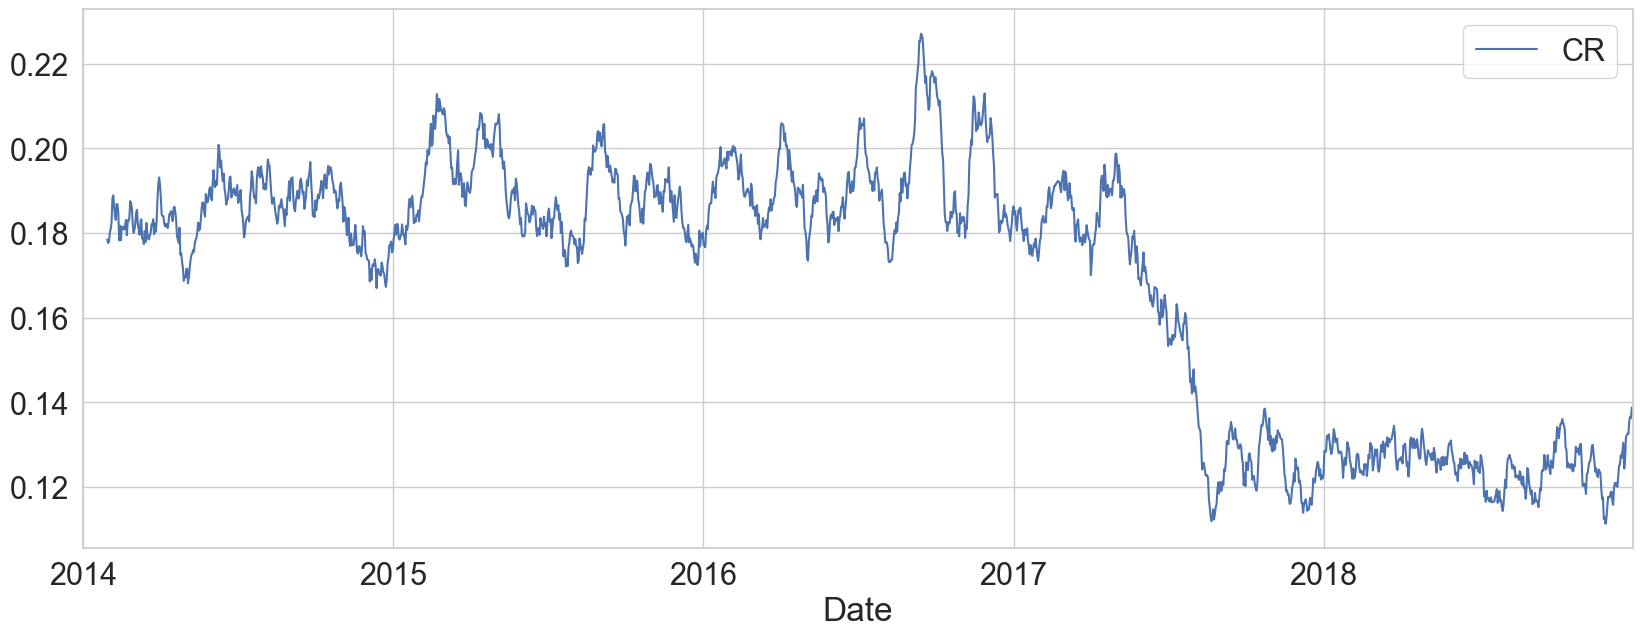

In [29]:
cr_by_day_rolling = cr_by_day.rolling(30).mean()
cr_by_day_rolling.plot()

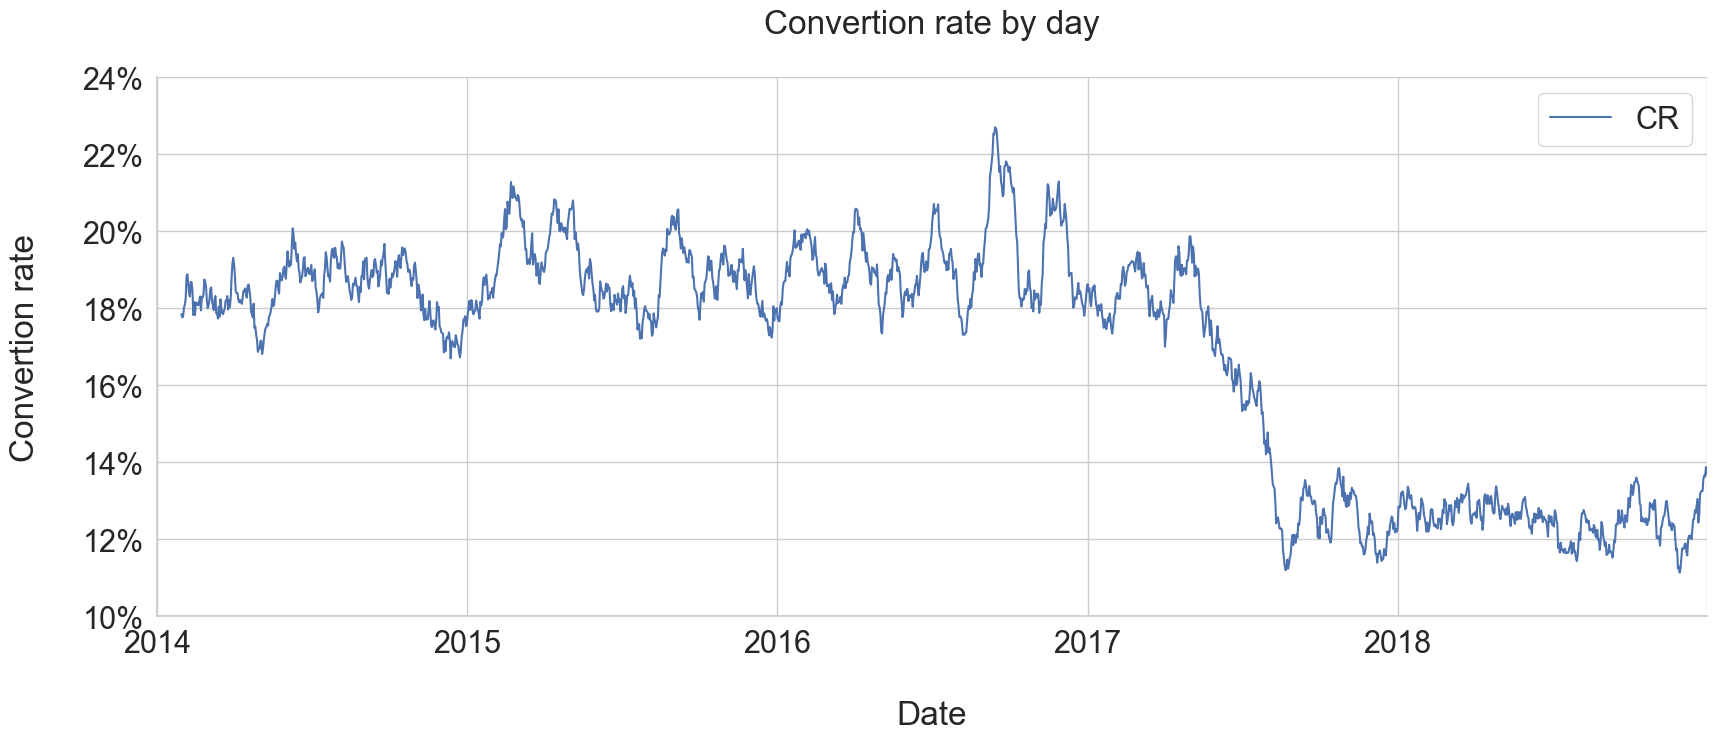

In [33]:
ax = cr_by_day_rolling.plot()
ax.set_title('Convertion rate by day\n')
ax.set_ylabel('Convertion rate\n')
ax.set_xlabel('\nDate')

yticks = ax.get_yticks()
ax.set_yticks(yticks)

ax.set_yticklabels(['{:.0%}'.format(n) for n in yticks])
sns.despine()

In [35]:
def get_plot(df, x_label='', y_label='', title=''):
    ax = df.plot()

    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)

    ax.set_yticklabels(['{:.0%}'.format(n) for n in yticks])
    sns.despine()

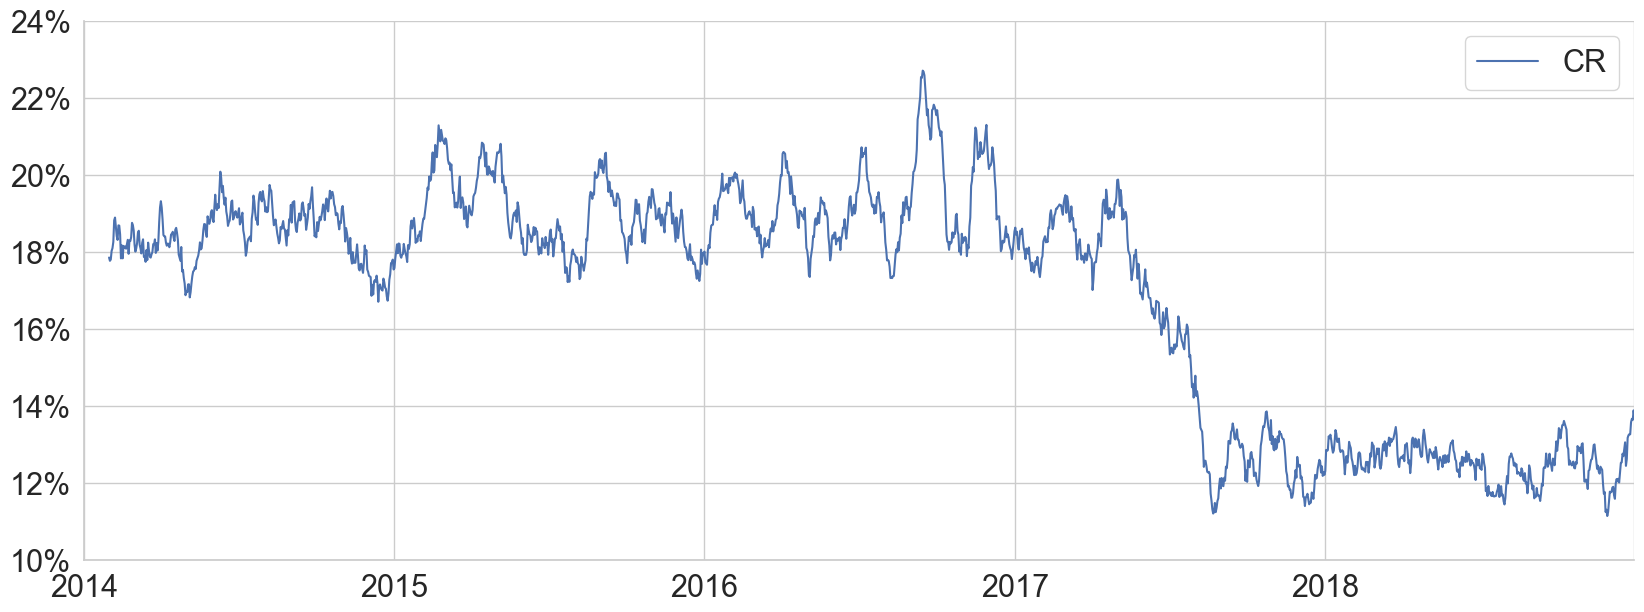

In [56]:
get_plot(cr_by_day_rolling)

In [48]:
cr_by_day_rolling_ = cr_by_day_rolling.reset_index().dropna()
cr_by_day_rolling_.head()

Date        CR
29 2014-01-30  0.178512
30 2014-01-31  0.177663
31 2014-02-01  0.177996
32 2014-02-02  0.180229
33 2014-02-03  0.180944

In [44]:
fig = px.line(cr_by_day_rolling_, x='Date', y='CR', title='Convertion rate by day\n')
fig.show()

In [46]:
order_leads_with_team_data = order_leads.merge(sales_team, how='left', on=['Company_Name', 'Company_Id'])

In [49]:
order_leads_with_team_data.head()

Order_Id        Company_Id            Company_Name       Date  \
0  HZSXLI1IS9RGABZW  D0AUXPP07H6AVSGD  Melancholy Social-Role 2017-10-13   
1  582WPS3OW8T6YT0R  D0AUXPP07H6AVSGD  Melancholy Social-Role 2017-09-02   
2  KRF65MQZBOYG4Y9T  D0AUXPP07H6AVSGD  Melancholy Social-Role 2016-12-21   
3  N3EDZ5V1WGSWW828  D0AUXPP07H6AVSGD  Melancholy Social-Role 2018-06-03   
4  QXBC8COXEXGFSPLP  D0AUXPP07H6AVSGD  Melancholy Social-Role 2014-07-26   

   Order_Value  Converted       Sales_Rep      Sales_Rep_Id  
0         6952          0  William Taylor  ZTZA0ZLYZR85PTUJ  
1         7930          0  William Taylor  ZTZA0ZLYZR85PTUJ  
2         5538          1  William Taylor  ZTZA0ZLYZR85PTUJ  
3         1113          0  William Taylor  ZTZA0ZLYZR85PTUJ  
4         4596          0  William Taylor  ZTZA0ZLYZR85PTUJ

In [50]:
top_sales = order_leads_with_team_data\
                                        .groupby(['Sales_Rep'], as_index=False) \
                                        .agg({'Converted': 'mean'}) \
                                        .sort_values('Converted') \
                                        .tail(10)
top_sales

Sales_Rep  Converted
346       Nick Allen   0.298507
192    Jennifer Peck   0.304348
468   Thomas Lindsey   0.304348
187     Jason Miller   0.307692
455       Teddy Cook   0.315789
225      Jose Gaines   0.326087
249  Katie Rodriquez   0.333333
466   Thomas Fortner   0.352941
438    Sierra Garcia   0.363636
151    Ginger Wright   0.368421

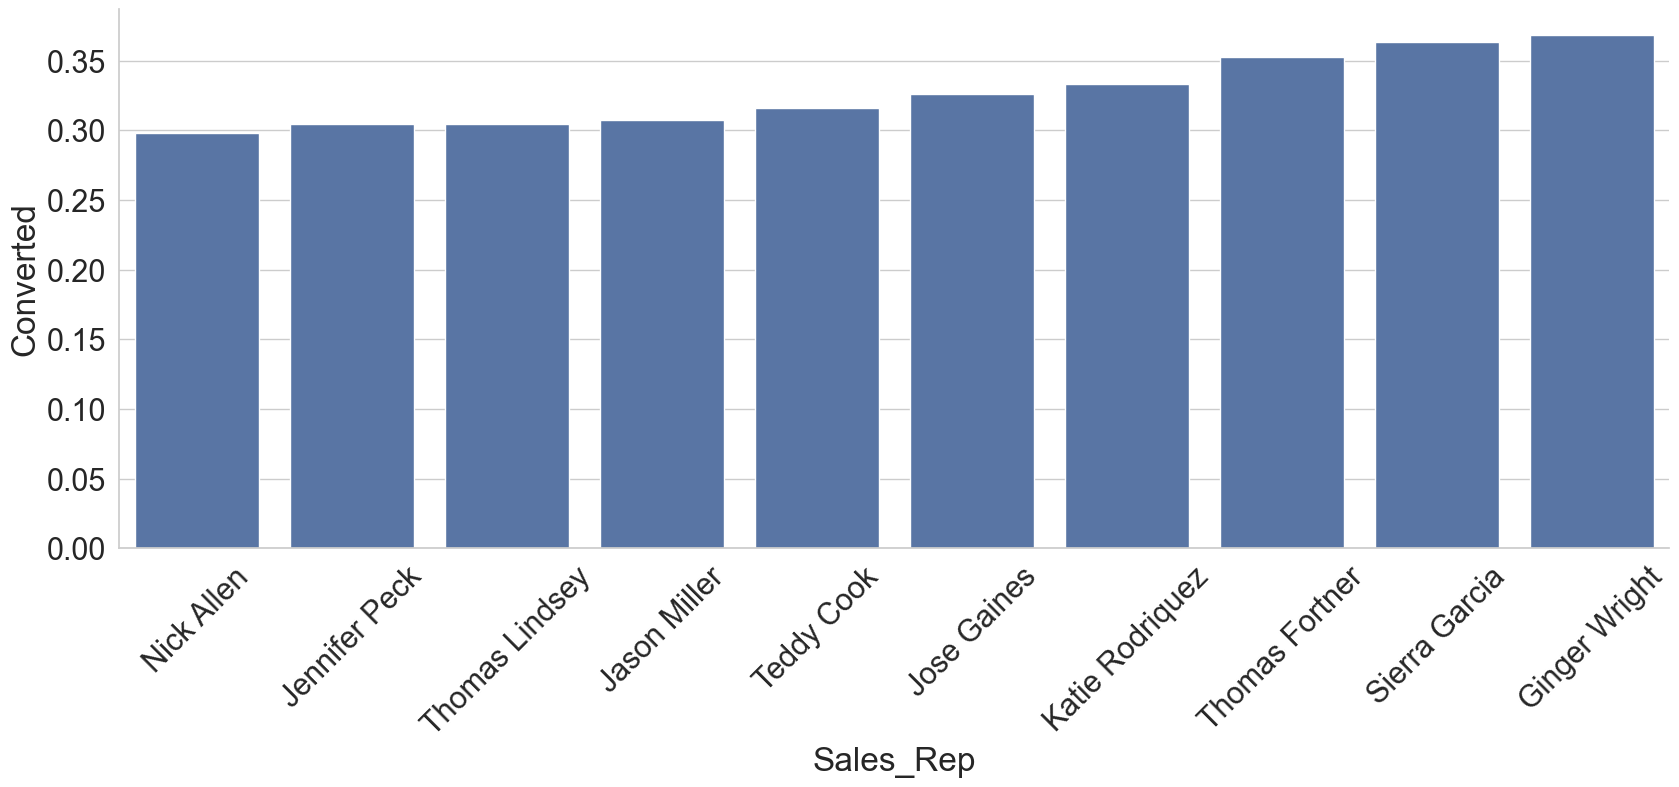

In [62]:
ax = sns.barplot(data=top_sales, y='Converted', x='Sales_Rep')
# Retrieve the current x-tick locations
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(top_sales.Sales_Rep, rotation=45)
sns.despine()

In [64]:
all_sales = order_leads_with_team_data\
                                        .groupby(['Sales_Rep'], as_index=False) \
                                        .agg({'Converted': 'mean'}) \
                                        .sort_values('Converted')
all_sales.head()

Sales_Rep  Converted
383      Richard Nicols   0.055556
188        Jason Rogers   0.076923
224           Jon Adams   0.085714
116      Elijah Valenti   0.094444
36   Beatrice Mccormick   0.095238

<Axes: xlabel='Converted', ylabel='Count'>

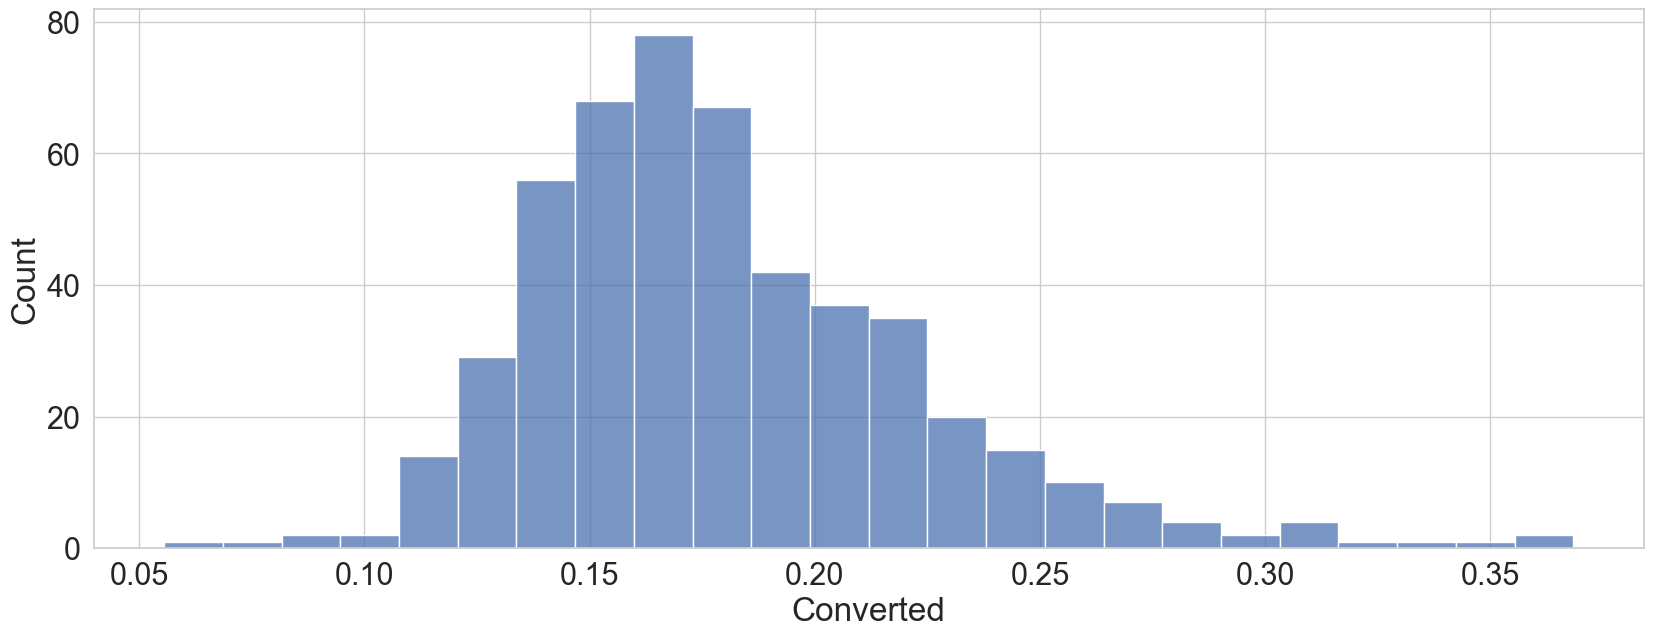

In [84]:
sns.histplot(all_sales.Converted, kde=False)

# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ

### 1) –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —Ü–µ–Ω—ã –∞–≤–æ–∫–∞–¥–æ (AveragePrice) —Å –æ–∫–Ω–æ–º —Ä–∞–≤–Ω—ã–º 3 (window).
–ß–µ–º—É —Ä–∞–≤–Ω–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ? –û—Ç–≤–µ—Ç –æ–∫—Ä—É–≥–ª–∏—Ç–µ –¥–æ 2 –∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —Ç–æ—á–∫–∏.

–ò–º–µ–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –æ—Ç Hass Avocado Board ü•ë:

            Date ‚Äî –¥–∞—Ç–∞
            AveragePrice ‚Äî —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –æ–¥–Ω–æ–≥–æ –∞–≤–æ–∫–∞–¥–æ
            Total Volume ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∞–≤–æ–∫–∞–¥–æ
            4046 ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∞–≤–æ–∫–∞–¥–æ PLU* 4046
            4225 ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∞–≤–æ–∫–∞–¥–æ PLU 4225
            4770 ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∞–≤–æ–∫–∞–¥–æ PLU 4770
            Total Bags ‚Äî –≤—Å–µ–≥–æ —É–ø–∞–∫–æ–≤–æ–∫
            Small Bags ‚Äî –º–∞–ª–µ–Ω—å–∫–∏–µ —É–ø–∞–∫–æ–≤–∫–∏
            Large Bags ‚Äî –±–æ–ª—å—à–∏–µ
            XLarge Bags ‚Äî –æ—á–µ–Ω—å –±–æ–ª—å—à–∏–µ
            type ‚Äî –æ–±—ã—á–Ω—ã–π –∏–ª–∏ –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–π
            year ‚Äî –≥–æ–¥
            Region ‚Äî –≥–æ—Ä–æ–¥ –∏–ª–∏ —Ä–µ–≥–∏–æ–Ω the city or region of the observation
            *PLU ‚Äî –∫–æ–¥ —Ç–æ–≤–∞—Ä–∞ (Product Lookup code)

*–í –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –¥–∞–Ω–Ω—ã–µ –Ω–µ –∑–∞ –∫–∞–∂–¥—ã–π –¥–µ–Ω—å, –∞ –∑–∞ –∫–æ–Ω–µ—Ü –∫–∞–∂–¥–æ–π –Ω–µ–¥–µ–ª–∏.
–î–ª—è –∫–∞–∂–¥–æ–π –¥–∞—Ç—ã –µ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, –æ—Ç–ª–∏—á–∞—é—â–∏—Ö—Å—è –ø–æ —Ç–∏–ø—É –∞–≤–æ–∫–∞–¥–æ –∏ —Ä–µ–≥–∏–æ–Ω—É –ø—Ä–æ–¥–∞–∂–∏.
–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –Ω–∞—Å —ç—Ç–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–µ –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç, –ø–æ—ç—Ç–æ–º—É –≤ avocado_mean –∑–∞–ø–∏—Å–∞–Ω—ã –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.

In [3]:
avocado_mean = pd.read_csv('https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv', index_col=0, parse_dates=['Date'] ).squeeze("columns")
avocado_mean

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

In [4]:
avocado_mean.rolling(3, min_periods=1).mean().max().round(2)

1.85

### 2) –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ —Å —Ä–∞–∑–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ window (2, 4, 10, 50).

In [5]:
# avo_mean_2 = avocado_mean.rolling(2).mean()
# avo_mean_4 = avocado_mean.rolling(4).mean()
# avo_mean_10 = avocado_mean.rolling(10).mean()
# avo_mean_50 = avocado_mean.rolling(50).mean()

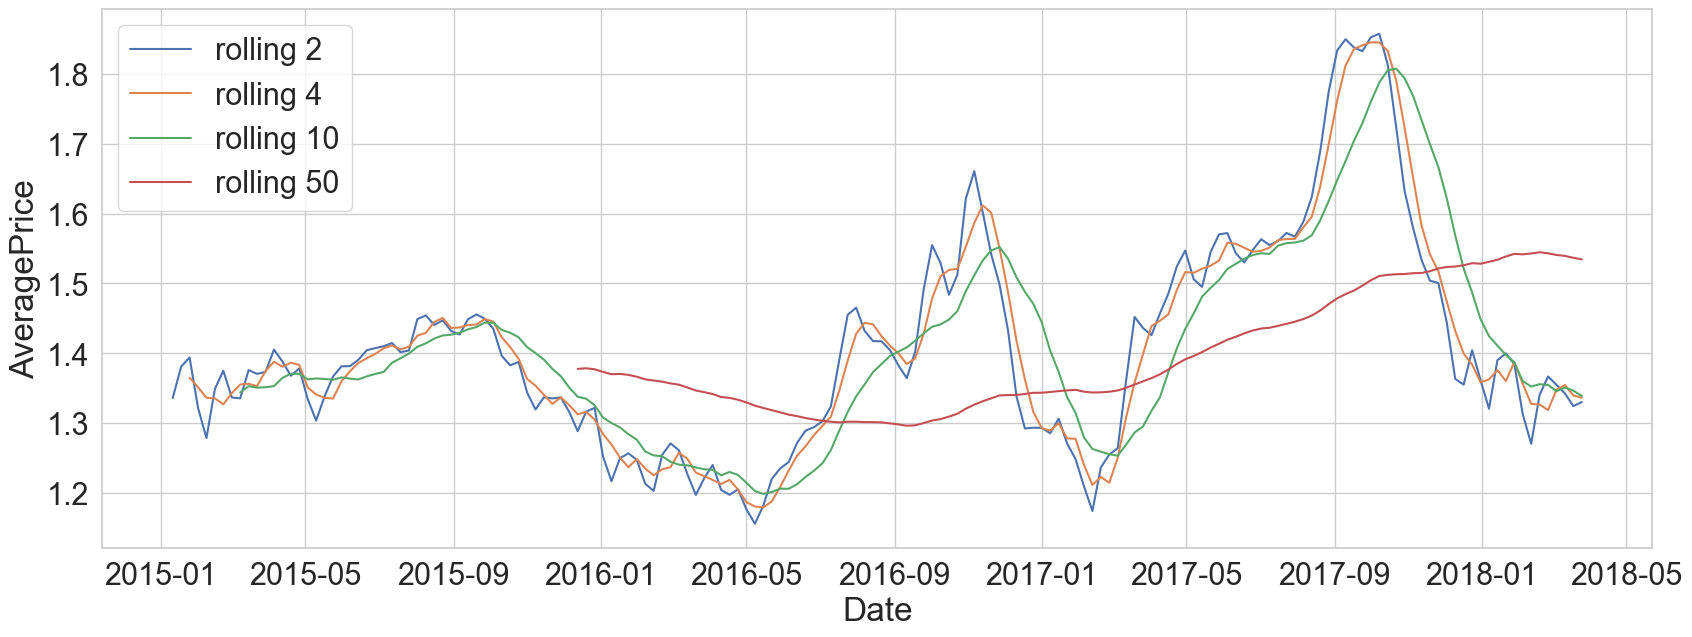

In [8]:
# sns.lineplot(x=avo_mean_2.index, y=avo_mean_2, label='rolling 2')
# sns.lineplot(x=avo_mean_4.index, y=avo_mean_4, label='rolling 4')
# sns.lineplot(x=avo_mean_10.index, y=avo_mean_10, label='rolling 10')
# sns.lineplot(x=avo_mean_50.index, y=avo_mean_50, label='rolling 50')

windows = [2, 4, 10, 50]

for window in windows:
    tdf = avocado_mean.rolling(window).mean()
    sns.lineplot(x=tdf.index, y=tdf, label=f'rolling {window}')

### 3) –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ avocado_mean.csv –æ —Ü–µ–Ω–∞—Ö –Ω–∞ –∞–≤–æ–∫–∞–¥–æ –∏ –ø—Ä–∏–º–µ–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é ewm() —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º span=2, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ.
–ó–∞–ø–∏—à–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ avocado_ewm.

In [11]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm

Date
2015-01-04    1.301296
2015-01-11    1.353310
2015-01-18    1.379480
2015-01-25    1.391394
2015-02-01    1.294758
                ...   
2018-02-25    1.356212
2018-03-04    1.352194
2018-03-11    1.340793
2018-03-18    1.322734
2018-03-25    1.338812
Name: AveragePrice, Length: 169, dtype: float64

In [12]:
avocado_exp = avocado_mean.expanding().mean()
avocado_exp

Date
2015-01-04    1.301296
2015-01-11    1.335972
2015-01-18    1.354352
2015-01-25    1.365046
2015-02-01    1.341444
                ...   
2018-02-25    1.407673
2018-03-04    1.407327
2018-03-11    1.406894
2018-03-18    1.406340
2018-03-25    1.405988
Name: AveragePrice, Length: 169, dtype: float64

### 4) –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ –¥–ª—è –∞–≤–æ–∫–∞–¥–æ —Ç–∏–ø–∞ organic (type) –≤ –ß–∏–∫–∞–≥–æ (region) –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —Å –æ–∫–Ω–æ–º 4 –∏ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º span=4.
–ò–º–ø–æ—Ä—Ç–∏—Ä—É–π—Ç–µ –ø–æ–ª–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, (avocado_full.csv) —É–∫–∞–∑–∞–≤ index_col=0 (–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–µ—Ä–≤—É—é –∫–æ–ª–æ–Ω–∫—É –∫–∞–∫ –∏–Ω–¥–µ–∫—Å).

In [13]:
avocado = pd.read_csv('https://stepik.org/media/attachments/lesson/362453/avocado_full.csv', index_col=0, parse_dates=['Date'])
avocado

AveragePrice  Total Volume        4046       4225       4770  \
Date                                                                       
2015-01-04          1.75      27365.89     9307.34    3844.81     615.28   
2015-01-04          1.49      17723.17     1189.35   15628.27       0.00   
2015-01-04          1.68       2896.72      161.68     206.96       0.00   
2015-01-04          1.52      54956.80     3013.04   35456.88    1561.70   
2015-01-04          1.64       1505.12        1.27    1129.50       0.00   
...                  ...           ...         ...        ...        ...   
2018-03-25          1.36     908202.13   142681.06  463136.28  174975.75   
2018-03-25          0.70    9010588.32  3999735.71  966589.50   30130.82   
2018-03-25          1.42     163496.70    29253.30    5080.04       0.00   
2018-03-25          1.70     190257.38    29644.09   70982.10       0.00   
2018-03-25          1.34    1774776.77    63905.98  908653.71     843.45   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-01-04    13598.46    13061.10      537.36         0.00       organic   
2015-01-04      905.55      905.55        0.00         0.00       organic   
2015-01-04     2528.08     2528.08        0.00         0.00       organic   
2015-01-04    14925.18    11264.80     3660.38         0.00  conventional   
2015-01-04      374.35      186.67      187.68         0.00       organic   
...                ...         ...         ...          ...           ...   
2018-03-25   127409.04   103579.41    22467.04      1362.59  conventional   
2018-03-25  4014132.29  3398569.92   546409.74     69152.63  conventional   
2018-03-25   129163.36   109052.26    20111.10         0.00       organic   
2018-03-25    89631.19    89424.11      207.08         0.00       organic   
2018-03-25   801373.63   774634.09    23833.93      2905.61  conventional   

            year              region  
Date                                  
2015-01-04  2015           Southeast  
2015-01-04  2015             Chicago  
2015-01-04  2015  HarrisburgScranton  
2015-01-04  2015          Pittsburgh  
2015-01-04  2015               Boise  
...          ...                 ...  
2018-03-25  2018             Chicago  
2018-03-25  2018        SouthCentral  
2018-03-25  2018        SouthCentral  
2018-03-25  2018          California  
2018-03-25  2018             NewYork  

[18249 rows x 12 columns]

In [15]:
organic_chicago = avocado.query('type == "organic" and region == "Chicago"')
organic_chicago

AveragePrice  Total Volume     4046      4225  4770  Total Bags  \
Date                                                                          
2015-01-04          1.49      17723.17  1189.35  15628.27   0.0      905.55   
2015-01-11          1.79      12915.74  1426.75  10900.10   0.0      588.89   
2015-01-18          1.81      12499.87  1154.81  10830.61   0.0      514.45   
2015-01-25          1.83      10951.51   711.63   9515.44   0.0      724.44   
2015-02-01          1.52      14391.05  1363.35  11835.47   0.0     1192.23   
...                  ...           ...      ...       ...   ...         ...   
2018-02-25          1.68      36432.65   246.73  29263.75   0.0     6922.17   
2018-03-04          1.62      46026.58  1107.05  35255.03   0.0     9664.50   
2018-03-11          1.66      41969.83   583.18  32382.95   0.0     9003.70   
2018-03-18          1.66      35542.17   184.53  26955.74   0.0     8401.90   
2018-03-25          1.69      35088.36   324.87  27550.29   0.0     7213.20   

            Small Bags  Large Bags  XLarge Bags     type  year   region  
Date                                                                     
2015-01-04      905.55        0.00          0.0  organic  2015  Chicago  
2015-01-11      588.89        0.00          0.0  organic  2015  Chicago  
2015-01-18      514.45        0.00          0.0  organic  2015  Chicago  
2015-01-25      724.44        0.00          0.0  organic  2015  Chicago  
2015-02-01     1192.23        0.00          0.0  organic  2015  Chicago  
...                ...         ...          ...      ...   ...      ...  
2018-02-25     6908.84       13.33          0.0  organic  2018  Chicago  
2018-03-04     9654.50       10.00          0.0  organic  2018  Chicago  
2018-03-11     8990.36       13.34          0.0  organic  2018  Chicago  
2018-03-18     8398.57        3.33          0.0  organic  2018  Chicago  
2018-03-25     7176.54       36.66          0.0  organic  2018  Chicago  

[169 rows x 12 columns]

In [17]:
organic_chicago['rolling'] = organic_chicago.AveragePrice.rolling(4).mean()

C:\Users\R\AppData\Local\Temp\ipykernel_13896\2848621075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_chicago['rolling'] = organic_chicago.AveragePrice.rolling(4).mean()


In [18]:
organic_chicago['ewm'] = organic_chicago.AveragePrice.ewm(span=4).mean()

C:\Users\R\AppData\Local\Temp\ipykernel_13896\322051468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_chicago['ewm'] = organic_chicago.AveragePrice.ewm(span=4).mean()


In [19]:
organic_chicago.head()

AveragePrice  Total Volume     4046      4225  4770  Total Bags  \
Date                                                                          
2015-01-04          1.49      17723.17  1189.35  15628.27   0.0      905.55   
2015-01-11          1.79      12915.74  1426.75  10900.10   0.0      588.89   
2015-01-18          1.81      12499.87  1154.81  10830.61   0.0      514.45   
2015-01-25          1.83      10951.51   711.63   9515.44   0.0      724.44   
2015-02-01          1.52      14391.05  1363.35  11835.47   0.0     1192.23   

            Small Bags  Large Bags  XLarge Bags     type  year   region  \
Date                                                                      
2015-01-04      905.55         0.0          0.0  organic  2015  Chicago   
2015-01-11      588.89         0.0          0.0  organic  2015  Chicago   
2015-01-18      514.45         0.0          0.0  organic  2015  Chicago   
2015-01-25      724.44         0.0          0.0  organic  2015  Chicago   
2015-02-01     1192.23         0.0          0.0  organic  2015  Chicago   

            rolling       ewm  
Date                           
2015-01-04      NaN  1.490000  
2015-01-11      NaN  1.677500  
2015-01-18      NaN  1.745102  
2015-01-25   1.7300  1.784118  
2015-02-01   1.7375  1.669563

<Axes: xlabel='Date'>

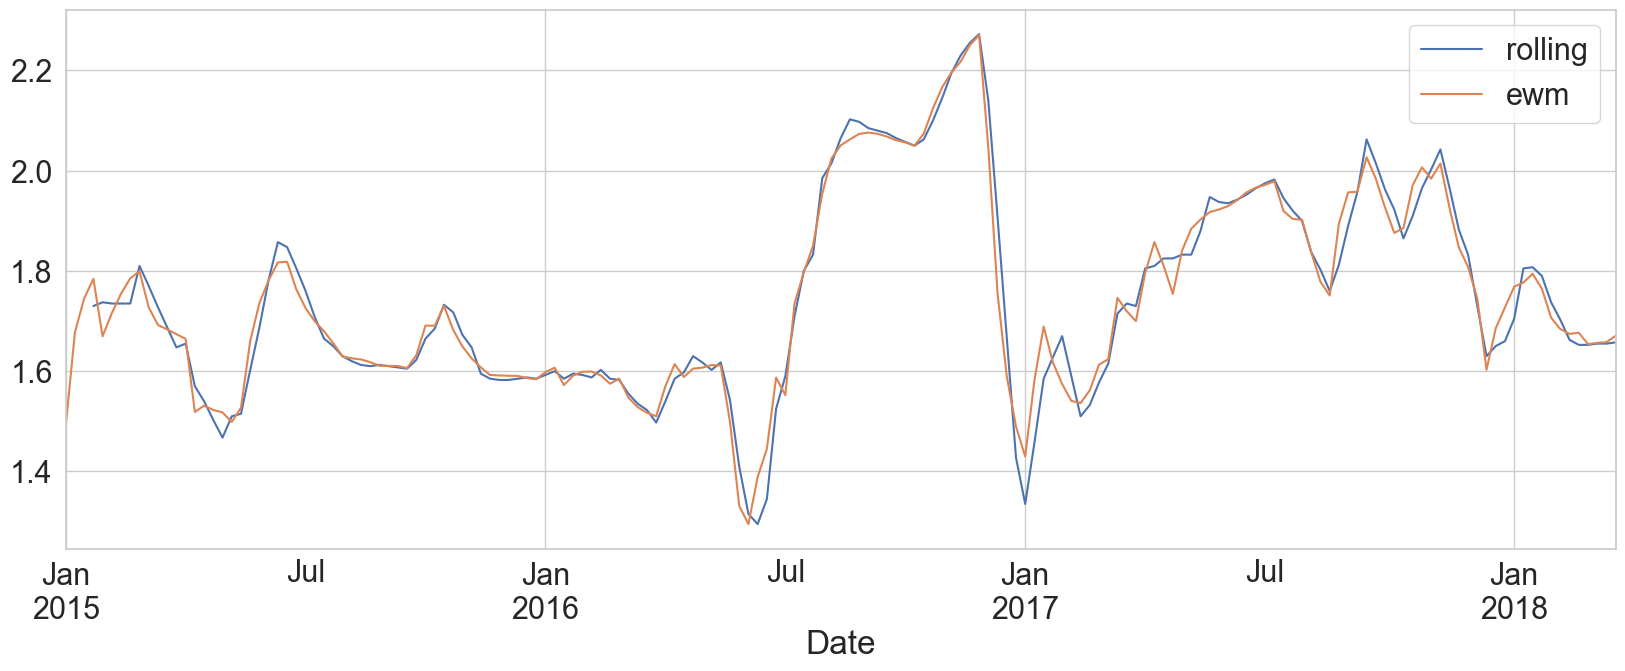

In [20]:
organic_chicago[['rolling', 'ewm']].plot()

In [21]:
organic_chicago.loc['2015-01-18', 'ewm']

1.7451020408163265

In [23]:
organic_chicago.loc['2015-01-18':'2015-02-01', 'rolling']

Date
2015-01-18       NaN
2015-01-25    1.7300
2015-02-01    1.7375
Name: rolling, dtype: float64

In [24]:
organic_chicago.loc['2015-01-25', 'AveragePrice':'4770']

AveragePrice        1.83
Total Volume    10951.51
4046              711.63
4225             9515.44
4770                 0.0
Name: 2015-01-25 00:00:00, dtype: object

### 5) –í —Ñ–∞–π–ª–µ delays –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–æ–º –∫–∞–∫–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏ —Å –∫–µ–º –∏ –Ω–∞ –∫–∞–∫—É—é —Å—É–º–º—É –∑–∞–∫–ª—é—á–∞–ª–∏ —Å–¥–µ–ª–∫–∏, –∞ —Å–∞–º–æ–µ –≤–∞–∂–Ω–æ–µ ‚Äì –Ω–∞—Å–∫–æ–ª—å–∫–æ –æ–Ω–∏ –ø—Ä–∏ —ç—Ç–æ–º –æ–ø–æ–∑–¥–∞–ª–∏. –í–æ—Ç —Å–∞–±—Å—ç—Ç –¥–∞–Ω–Ω—ã—Ö

 		client_idcompany_id	delay		revenue
 	0	2389	4240	-1 days -14:57:48.000000000	705436
 	1	7614	9544	-4 days -02:14:23.000000000	859266
 	2	2052	2427	-0 days -06:08:57.000000000	812416
 	3	9635	8054	-0 days -23:40:19.000000000	162312
 	4	8154	5503	-1 days -13:21:53.000000000	658844

–°–Ω–∞—á–∞–ª–∞ –¥–∞–≤–∞–π—Ç–µ –ø–µ—Ä–µ–≤–µ–¥—ë–º delay –≤ timedelta —Ñ–æ—Ä–º–∞—Ç. –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ —Å—Ç–æ–ª–±–µ—Ü –Ω–µ –ø–µ—Ä–µ–≤–µ–¥—ë—Ç—Å—è ‚Äì –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç —É–±—Ä–∞—Ç—å -. –°–æ—Ö—Ä–∞–Ω–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é df, –æ—Ç—Ñ–æ—Ä–º–∞—Ç–∏—Ä—É–π—Ç–µ –∫–æ–ª–æ–Ω–∫—É –Ω—É–∂–Ω—ã–º —Å–ø–æ—Å–æ–±–æ–º (–ø–æ–¥—Å–∫–∞–∑–∫–∞ ‚Äì —É–±–µ—Ä–∏—Ç–µ -) –∏ –ø–µ—Ä–µ–≤–µ–¥–∏—Ç–µ –µ—ë –≤ —Ç–∏–ø timedelta.
–ú–æ–≥—É—Ç –ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è:
pd.to_timedelta()
pd.Series.str

In [40]:
df = pd.read_csv('https://stepik.org/media/attachments/course/72204/delays.csv')
df

client_id  company_id                        delay  revenue
0         2389        4240  -1 days -14:57:48.000000000   705436
1         7614        9544  -4 days -02:14:23.000000000   859266
2         2052        2427  -0 days -06:08:57.000000000   812416
3         9635        8054  -0 days -23:40:19.000000000   162312
4         8154        5503  -1 days -13:21:53.000000000   658844
..         ...         ...                          ...      ...
259       5837        2617  -0 days -05:32:08.000000000   602129
260       2384        2364  -3 days -23:27:14.000000000   910660
261       5146        3331  -1 days -15:22:34.000000000   401137
262       7203        5532  -2 days -17:15:02.000000000   308979
263       3822        9882  -1 days -15:50:29.000000000   877773

[264 rows x 4 columns]

In [41]:
pd.to_timedelta('-1 days -14:57:48.000000000')

ValueError: only leading negative signs are allowed

In [42]:
pd.to_timedelta('-1 days 14:57:48.000000000')

Timedelta('-1 days +14:57:48')

In [43]:
pd.to_timedelta('-1 days 14:57:48.000000000').total_seconds() / (60 * 60)

-9.036666666666667

In [44]:
pd.to_timedelta('1 days 14:57:48.000000000').total_seconds() / (60 * 60)

38.96333333333333

–¢—Ä–µ–±—É–µ—Ç—Å—è —É–±—Ä–∞—Ç—å –º–∏–Ω—É—Å—ã –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [45]:
'-1 days -14:57:48.000000000'.replace('-', '')

'1 days 14:57:48.000000000'

In [48]:
df['delay'] = pd.to_timedelta(df.delay.str.replace('-', ''))

In [49]:
df.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

### 6) –í—Ä–µ–º—è —ç—Ç–æ —Ö–æ—Ä–æ—à–æ, –Ω–æ —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã —Ç–∞–∫–∂–µ —Ä–∞–∑–±–∏—Ç—å –µ–≥–æ –Ω–∞ –ø—Ä–æ–º–µ–∂—É—Ç–∫–∏. –†–∞–∑–±–µ–π—Ç–µ –≤—Ä–µ–º—è –Ω–∞ 3 –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –∏ –ø–æ–º–µ—Å—Ç–∏—Ç–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∫–æ–ª–æ–Ω–∫—É delay_categorical

In [65]:
df['delay_categorical'] = pd.cut(x = df.delay, bins=3)

In [66]:
df

client_id  company_id           delay  revenue  \
0         2389        4240 1 days 14:57:48   705436   
1         7614        9544 4 days 02:14:23   859266   
2         2052        2427 0 days 06:08:57   812416   
3         9635        8054 0 days 23:40:19   162312   
4         8154        5503 1 days 13:21:53   658844   
..         ...         ...             ...      ...   
259       5837        2617 0 days 05:32:08   602129   
260       2384        2364 3 days 23:27:14   910660   
261       5146        3331 1 days 15:22:34   401137   
262       7203        5532 2 days 17:15:02   308979   
263       3822        9882 1 days 15:50:29   877773   

                                     delay_categorical  
0    (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
1         (3 days 08:05:36.333333333, 4 days 23:51:14]  
2    (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
3    (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
4    (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
..                                                 ...  
259  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
260       (3 days 08:05:36.333333333, 4 days 23:51:14]  
261  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
262  (1 days 16:19:58.666666666, 3 days 08:05:36.33...  
263  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  

[264 rows x 5 columns]

### 7) –†–∞–∑–±–∏–ª–æ—Å—å –∫–æ–Ω–µ—á–Ω–æ –Ω–µ–ø–ª–æ—Ö–æ, –Ω–æ —Ö–æ—á–µ—Ç—Å—è —á—É—Ç—å –±–æ–ª–µ–µ —Ü–µ–ª—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –±–æ–ª–µ–µ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–µ –Ω–∞–∑–≤–∞–Ω–∏—è. –í —ç—Ç–æ–º –Ω–∞–º –ø–æ–º–æ–≥—É—Ç –∞—Ä–≥—É–º–µ–Ω—Ç—ã —Ñ—É–Ω–∫—Ü–∏–∏ pd.cut! –ü–µ—Ä–µ–∑–∞–¥–∞–π—Ç–µ –∫–æ–ª–æ–Ω–∫—É delay_categorical, —á—Ç–æ–±—ã –∑–Ω–∞—á–µ–Ω–∏—è –≤ –Ω–µ–π –±—ã–ª–∏
            'less than 1 day' ‚Äì –≤—Ä–µ–º—è –æ—Ç 0 –¥–æ 1 –¥–Ω—è
            '1-2 days' ‚Äì –æ—Ç 1 –¥–æ 2 –¥–Ω–µ–π
            '2-3 days' ‚Äì –æ—Ç 2 –¥–æ 3 –¥–Ω–µ–π
            'more than 3 days' ‚Äì –±–æ–ª—å—à–µ 3 –¥–Ω–µ–π
–ù–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è —Å–ª–µ–¥—É—é—â–µ–≥–æ –ø—Ä–∏–º–µ—Ä–∞

            client_id  company_id  delay            revenue
            14345      54631       2 days 13:34:45  145345
            54434      54834       1 days 08:26:00  453245
            34905      49834       0 days 00:26:03  14543
—Ä–µ–∑—É–ª—å—Ç–æ–º –±—É–¥–µ—Ç

            client_id  company_id  delay            revenue  delay_categorical
            14345      54631       2 days 13:34:45  145345   2-3 days
            54434      54834       1 days 08:26:00  453245   1-2 days
            34905      49834       0 days 00:26:03  14543    less than 1 day

In [67]:
bins = [
    pd.to_timedelta('0d'),
    pd.to_timedelta('1d'),
    pd.to_timedelta('2d'),
    pd.to_timedelta('3d'),
    pd.to_timedelta('100d')
]

In [68]:
labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']

In [69]:
df['delay_categorical'] = pd.cut(df.delay, bins=bins, labels=labels)

In [70]:
df

client_id  company_id           delay  revenue delay_categorical
0         2389        4240 1 days 14:57:48   705436          1-2 days
1         7614        9544 4 days 02:14:23   859266  more than 3 days
2         2052        2427 0 days 06:08:57   812416   less than 1 day
3         9635        8054 0 days 23:40:19   162312   less than 1 day
4         8154        5503 1 days 13:21:53   658844          1-2 days
..         ...         ...             ...      ...               ...
259       5837        2617 0 days 05:32:08   602129   less than 1 day
260       2384        2364 3 days 23:27:14   910660  more than 3 days
261       5146        3331 1 days 15:22:34   401137          1-2 days
262       7203        5532 2 days 17:15:02   308979          2-3 days
263       3822        9882 1 days 15:50:29   877773          1-2 days

[264 rows x 5 columns]

### 8) –¢–µ–ø–µ—Ä—å –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–π –±–∞—Ä–ø–ª–æ—Ç —Å —Ç–µ–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ —á–∞—Å—Ç–æ –∑–∞–¥–µ—Ä–∂–∏–≤–∞—é—Ç—Å—è —Å–¥–µ–ª–∫–∏, –≤—ã—è—Å–Ω–∏—Ç–µ —Å–∞–º—ã–π —Ä–µ–¥–∫–∏–π –∏ —Å–∞–º—ã–π —á–∞—Å—Ç—ã–π –≤–∞—Ä–∏–∞–Ω—Ç—ã.

<Axes: xlabel='delay_categorical', ylabel='count'>

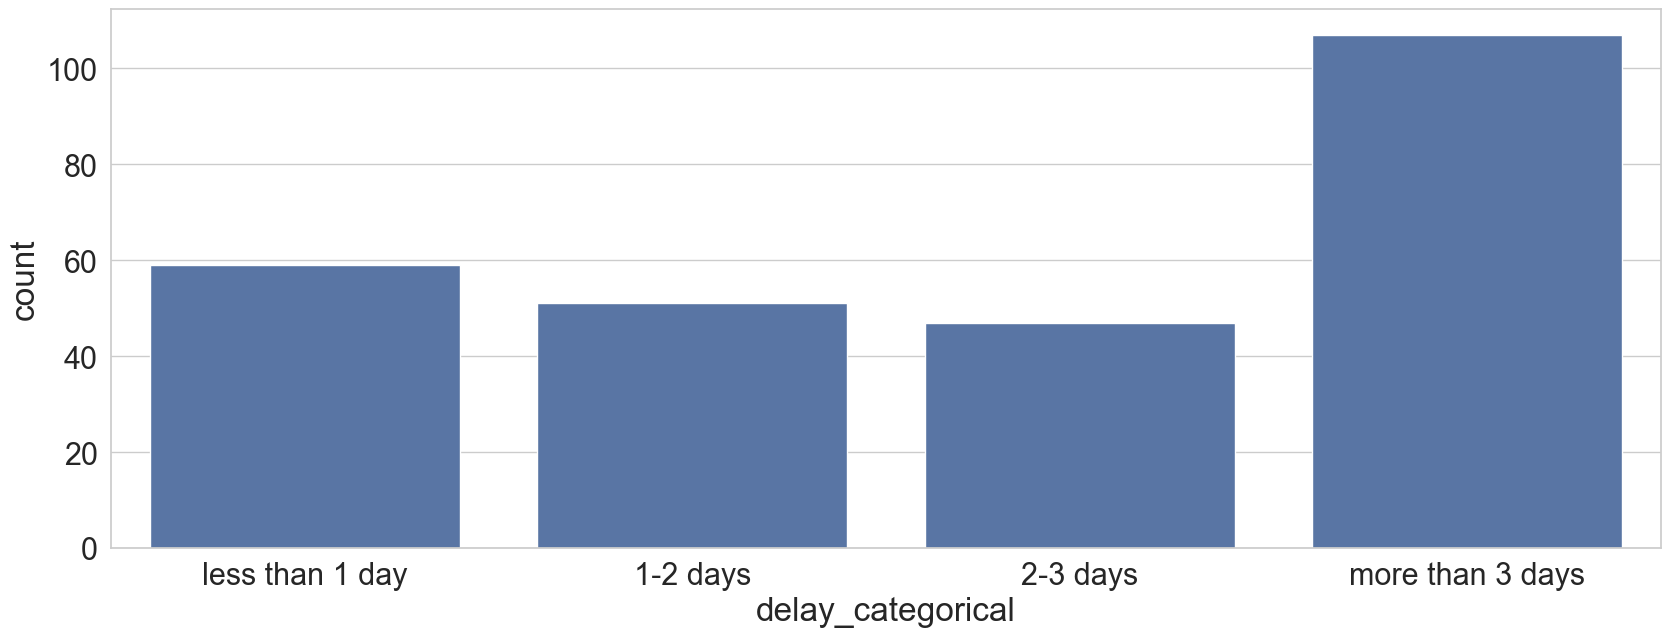

In [72]:
sns.countplot(data=df, x='delay_categorical')

In [82]:
counts = df.delay_categorical.value_counts()
counts

delay_categorical
more than 3 days    107
less than 1 day      59
1-2 days             51
2-3 days             47
Name: count, dtype: int64

In [96]:
category_orders={'delay_categorical': ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']}

In [97]:
fig = px.bar(
    counts,
    x=counts.index,
    y=counts.values,
    category_orders=category_orders,
    title='–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ö–∞—Ç–µ–≥–æ—Ä–∏—è–º'
)

# –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –æ—Å–µ–π
fig.update_layout(
    xaxis_title="–ö–∞—Ç–µ–≥–æ—Ä–∏—è",
    yaxis_title="–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ"
)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
fig.show()